<a href="https://colab.research.google.com/github/in3der/DataAnalysis/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EB%B0%8F%ED%99%9C%EC%9A%A9%5D%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EA%B8%B0%EB%B3%B8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**경사하강법 실습**
> 경사의 반대방향으로 이동하여 최소점을 찾음.


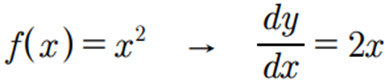

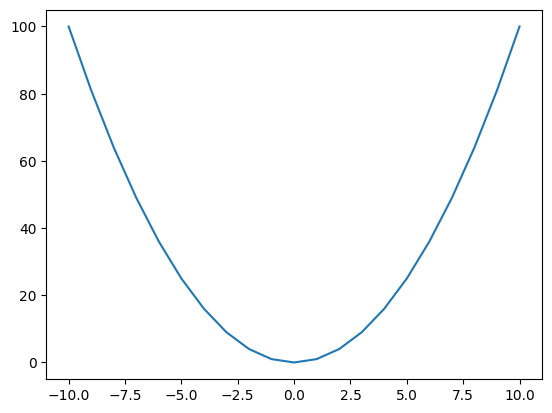

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(-10,11,1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

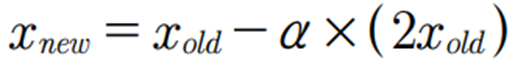

미분값을 원래 있던 값에서 계속 빼줌.
> alpha : 학습률

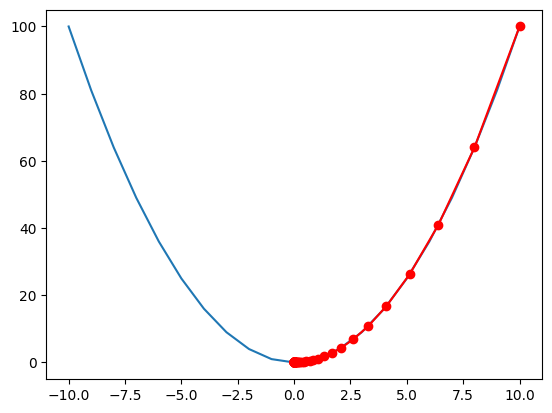

In [ ]:
x_new = 10    # 임의의 시작점
derivative = [x_new]
y = [x_new **2]
learng_rate= 0.1

for i in range(100):
    old_value = x_new
    x_new = old_value - learng_rate *2* old_value   # 미분을 learning rate만큼 반영해서 계속 빼줌
    derivative.append(x_new)
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.plot(derivative, y, "ro-")  # ro- 색상, 마커, 대시 순(red, 동그란 마커, -선)
plt.show()

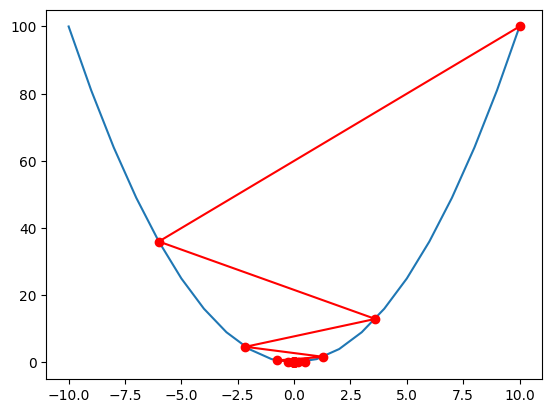

In [ ]:
x_new = 10
derivative = [x_new]
y = [x_new **2]
learng_rate= 0.8    # learning rate 너무 큰 경우  진동을 한다.

for i in range(100):
    old_value = x_new
    x_new = old_value - learng_rate *2* old_value
    derivative.append(x_new)
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.plot(derivative, y, "ro-")
plt.show()

**선형회귀 성능 측정하기**

1. Train/Test Split
> test_size=0.33 : 33%의 테스트 데이터
> random_state : 결과를 같게 하기 위해서 사용함 seed가 같다 = 결과가 같다. 보통 현재 시간을 시드로 쓴다.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(20).reshape((10, 2)), range(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(y_train, y_test)

[0, 3, 1, 7, 8, 5] [2, 9, 6, 4]


2. MAE (Mean Absolute Error)

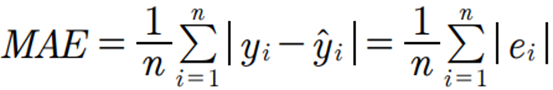

선형회귀의 성능을 평가하는 방법 첫 번째 MAE
> 절댓값을 더해준다.

In [ ]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)
# median_absoulte_error = mean_absolute_error

0.5

3. RMSE (Root Mean Squared Error)

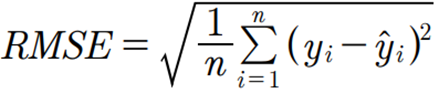

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)
# cf. mean_squared_error(y, x, squared=False) # squared=False를 넣어주어야 루트를 씌워 준다.
# squared=False를 안쓰면 그냥 MSE를 반환한다.

0.375

4. R-squared

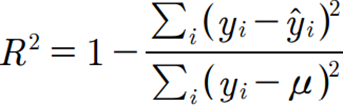

In [ ]:
from sklearn.metrics import r2_score    # 상관계수를 구함. 1에 가까울수록 좋은 머신러닝 모델.
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

**경사하강법을 선형회귀로 구현**

1. 데이터 생성

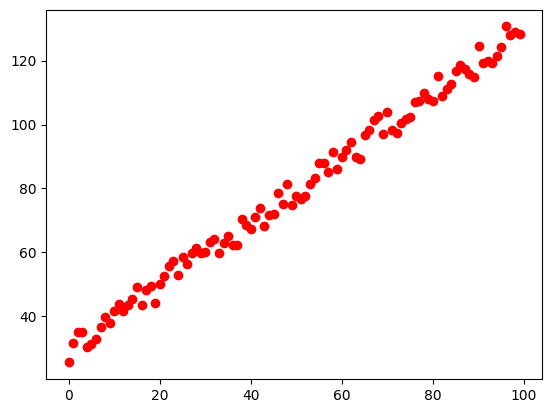

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance):    # variance : 노이즈를 더한다 (0: 노이즈 없이 깔끔하게 나옴)
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = 1 # (2) 데이터 x의 상수항에는 1
        x[i][1] = i # (3) 데이터 x 값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0, 1) * variance
        # (4) 데이터 y에 bias 생성
    return x, y

# x, y = gen_data(100, 0, 0)    # (1) 100개의 데이터 생성 # variance : 노이즈
# x, y = gen_data(100, 25, 0)   # bias : y절편 을 25만큼 올린다.
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 1], y, "ro")    # (5) 데이터 x와 y의 상관관계 그래프 작성, red + 'o' marker
# plt.scatter(x[:,1], y, c='r')
plt.show()

2. 데이터에 경사하강법 적용

In [ ]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []                               # (5) theta (파라메터)를 주기마다 저장할 리스트
    cost_list = []                                # (6) cost (비용)을 매 주기마다 저장할 리스트
    for i in range(0, numIterations):             # (7) 반복 횟수만큼 반복합니다.
        hypothesis = np.dot(x, theta)             # (8) y=b+a*x=theta[0]*x[][0] + theta[1]*x[][1]
        loss = hypothesis - y                     # (9) loss (손실) 계산
        cost = np.sum(loss ** 2) / (2 * m)        # (10) cost (비용) 계산
        gradient = np.dot(xTrans, loss) / m       # (11) 경사 (gradient) 계산. .dot으로 행렬곱연산
        theta = theta - alpha * gradient          # (12) 경사 (gradient) 방향으로  alpha만큼 이동해서 업데이트
        if i % 250 == 0:                          # (13) 250번마다 thetha와 cost 값을 리스트에 저장해둔다
            theta_list.append(theta)
        cost_list.append(cost)
    return theta, np.array(theta_list), cost_list # (14) 최종결과 (theta), 중간 과정 중 theta와 cost 값 저장 리스트 반환

m, n = np.shape(x)   # (1) m: data 개수, n: model parameter 개수 (y=ax+b에서의 a와 b)
numIterations = 20000 # (2) 반복횟수 지정
alpha = 0.0005       # (3) 학습률 (learning rate) 지정
theta = np.ones(n)   # (4) 가중치 (weight / 모델파라메터)의 초기값 지정

print(m, n)

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations)

100 2


3. 중간에 저장된 선형 함수의 결과 (theta) 를 확인합니다.

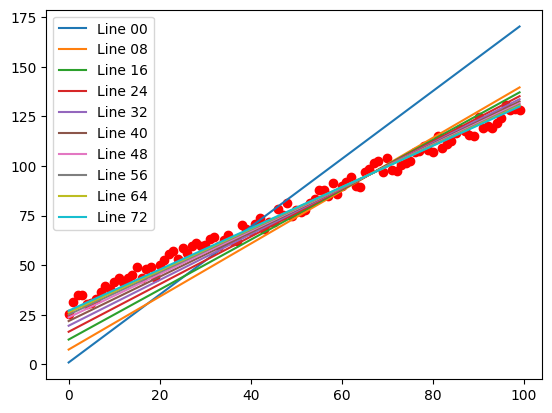

In [ ]:
y_predict_step= np.dot(x, theta_list.transpose())

plt.plot(x[:, 1], y, "ro")

for i in range (0, 80, 8):
    plt.plot(x[:,1], y_predict_step[:,i], label='Line %02d'%i)

plt.legend()
plt.show()

4. 최종 결과 (직선)과 학습 데이터를 비교 확인합니다.

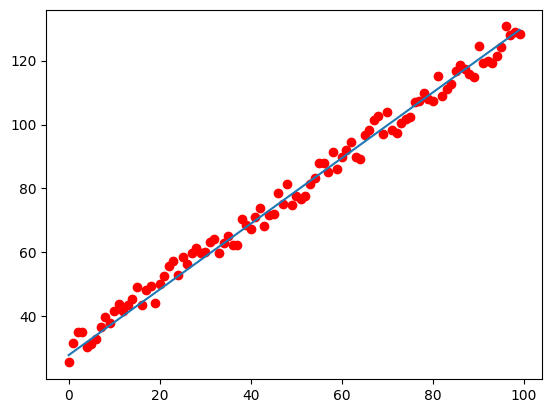

In [ ]:
y_predict= np.dot(x, theta)
plt.plot(x[:, 1], y, "ro")
plt.plot(x[:, 1], y_predict)
plt.show()

5. 중간 손실 (cost)을 확인합니다.

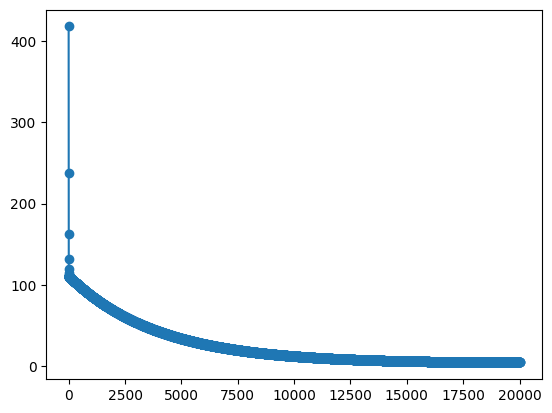

In [ ]:
iterations = range(len(cost_list))

plt.plot(iterations, cost_list, "o-")
plt.show()

# 내려가는 방향 : iterations 추가 필요
# 진동한다 : learning rate 줄여주어야 함.